In [364]:
#Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
import scipy.stats as stats
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA 
from collections import Counter
%matplotlib inline

cwd = os.getcwd()
print(cwd)

#Change working directory
os.chdir(r'''C:\Users\wscott\AppData\Local\Programs\Python''')
print(cwd)

sms_raw = pd.read_csv('amazon_cells_labelled.txt', delimiter= '\t', header=None)

C:\Users\wscott\AppData\Local\Programs\Python
C:\Users\wscott\AppData\Local\Programs\Python


In [365]:
sms_raw.columns = ['message', 'target']
sms_raw

,message,target
0,So there is no way for me to plug it in here i...,0
1,"Good case, Excellent value.",1
2,Great for the jawbone.,1
3,Tied to charger for conversations lasting more...,0
4,The mic is great.,1
5,I have to jiggle the plug to get it to line up...,0
6,If you have several dozen or several hundred c...,0
7,If you are Razr owner...you must have this!,1
8,"Needless to say, I wasted my money.",0
9,What a waste of money and time!.,0


In [366]:
bad_df = sms_raw[sms_raw.target == 0].message
display(bad_df)

0      So there is no way for me to plug it in here i...
3      Tied to charger for conversations lasting more...
5      I have to jiggle the plug to get it to line up...
6      If you have several dozen or several hundred c...
8                    Needless to say, I wasted my money.
9                       What a waste of money and time!.
12     If the two were seperated by a mere 5+ ft I st...
14     The design is very odd, as the ear "clip" is n...
16                   I advise EVERYONE DO NOT BE FOOLED!
19     It clicks into place in a way that makes you w...
20     I went on Motorola's website and followed all ...
22              The commercials are the most misleading.
24     I bought it for my mother and she had a proble...
27     I didn't think that the instructions provided ...
28     People couldnt hear me talk and I had to pull ...
29                                  Doesn't hold charge.
30     This is a simple little phone to use, but the ...
32      It is unusable in a mov

In [367]:
pos_df = sms_raw[sms_raw.target == 1].message
pos_df

1                            Good case, Excellent value.
2                                 Great for the jawbone.
4                                      The mic is great.
7            If you are Razr owner...you must have this!
10                       And the sound quality is great.
11     He was very impressed when going from the orig...
13                              Very good quality though
15     Highly recommend for any one who has a blue to...
17                                      So Far So Good!.
18                                         Works great!.
21     I bought this to use with my Kindle Fire and a...
23     I have yet to run this new battery below two b...
25                  Great Pocket PC / phone combination.
26     I've owned this phone for 7 months now and can...
31     This product is ideal for people like me whose...
34     Car charger as well as AC charger are included...
36                             It has kept up very well.
38        The case is great and

In [426]:
test = bad_df.values.tolist()
test_list = []
print(test[1].split())
for x in test[1].split():
    lower_case = [x.lower().replace(".", "")]
#    lower_case = lowercase]
    test_list = test_list + lower_case
    print(x.lower())
test_list

['Tied', 'to', 'charger', 'for', 'conversations', 'lasting', 'more', 'than', '45', 'minutes.MAJOR', 'PROBLEMS!!']
tied
to
charger
for
conversations
lasting
more
than
45
minutes.major
problems!!


['tied',
 'to',
 'charger',
 'for',
 'conversations',
 'lasting',
 'more',
 'than',
 '45',
 'minutesmajor',
 'problems!!']

In [437]:
bad_review_list = bad_df.values.tolist()
bad_review_words = []
for reviews in bad_review_list:
    for x in reviews.split():
        lower_case = [x.lower().replace(".", "").replace(",", "").replace("!", "").replace(":", "")]
        bad_review_words = bad_review_words + lower_case
bad_counts = Counter(bad_review_words)
print(len(dict(bad_counts)))
print(bad_counts)

1334
Counter({'the': 276, 'i': 162, 'it': 152, 'and': 122, 'a': 113, 'to': 110, 'is': 102, 'not': 102, 'this': 101, 'phone': 76, 'my': 71, 'of': 70, 'for': 55, 'in': 54, 'was': 54, 'with': 47, 'you': 46, 'that': 46, 'on': 44, 'have': 35, 'very': 34, 'had': 27, 'as': 25, 'but': 25, 'work': 25, 'if': 24, "don't": 23, 'battery': 22, 'product': 22, 'all': 21, 'after': 21, 'me': 20, 'are': 20, 'use': 20, 'ear': 19, 'does': 19, 'money': 18, 'your': 18, 'quality': 18, 'one': 17, 'from': 17, 'would': 17, 'only': 17, 'so': 16, 'time': 16, 'headset': 16, 'at': 16, 'be': 16, 'out': 16, 'or': 15, 'then': 15, 'do': 15, 'first': 15, 'poor': 15, 'service': 15, 'when': 15, 'no': 14, 'get': 14, 'up': 14, 'waste': 14, 'sound': 14, "doesn't": 14, 'buy': 14, 'bad': 14, 'what': 13, 'could': 13, 'good': 13, 'too': 13, 'worst': 13, 'ever': 13, 'charger': 12, 'like': 12, "i'm": 12, 'will': 12, 'more': 11, 'calls': 11, 'off': 11, '2': 11, 'about': 11, 'really': 11, 'also': 11, "it's": 11, 'same': 11, 'piece': 

In [441]:
pos_review_list = pos_df.values.tolist()
pos_review_words = []
for reviews in pos_review_list:
    for x in reviews.split():
        lower_case = [x.lower().replace(".", "").replace(",", "").replace("!", "").replace(":", "")]
        pos_review_words = pos_review_words + lower_case
pos_counts = Counter(pos_review_words)
print(len(dict(pos_counts)))
print(pos_counts)

1172
Counter({'the': 237, 'and': 188, 'i': 154, 'is': 141, 'it': 127, 'this': 104, 'a': 104, 'great': 92, 'to': 86, 'phone': 86, 'my': 72, 'very': 69, 'for': 65, 'with': 64, 'good': 62, 'of': 49, 'works': 45, 'on': 44, 'have': 38, 'was': 36, 'in': 34, 'product': 33, 'that': 32, 'quality': 31, 'well': 31, 'headset': 31, 'excellent': 26, 'sound': 26, 'so': 26, 'price': 25, 'has': 24, 'one': 23, 'are': 22, 'battery': 22, 'use': 21, 'best': 21, 'had': 21, 'nice': 21, 'but': 21, 'you': 20, 'recommend': 20, 'as': 20, 'all': 20, 'love': 20, "i've": 19, 'than': 19, 'like': 18, 'case': 17, 'would': 17, 'from': 16, "it's": 16, 'ear': 16, 'any': 15, 'not': 15, 'really': 15, '-': 14, 'comfortable': 14, 'easy': 14, 'your': 14, 'happy': 13, 'these': 13, 'new': 12, 'up': 12, 'fine': 12, 'bluetooth': 12, 'just': 12, 'been': 12, 'no': 12, 'better': 12, 'am': 12, 'can': 11, 'car': 11, 'even': 11, 'time': 11, 'also': 11, 'be': 11, 'far': 10, 'clear': 10, 'device': 10, 'worked': 10, 'cell': 10, 'fits': 10

In [443]:
neg_keywords = ['wasted', 'waste', 'problem', 'problems', 'couldn\'t', 'didn\'t', 'wouldn\'t', 'fooled', 'can\'t', 'breaks',
               'disappointed', 'junk', 'worst']

for key in neg_keywords:
    # Note that we add spaces around the key so that we're getting the word,
    # not just pattern matching.
    sms_raw[str(key)] = sms_raw.message.str.contains(
        ' ' + str(key) + ' ',
        case=False
    )

In [444]:
sms_raw['allcaps'] = sms_raw.message.str.isupper()

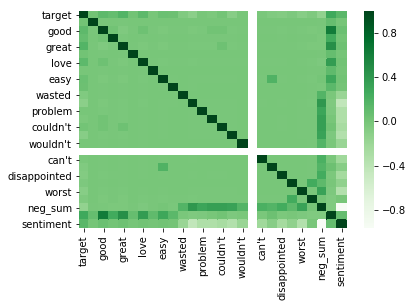

In [445]:
sns.heatmap(sms_raw.corr(), cmap='Greens')

In [486]:
pos_keywords = ['ideal', 'good', 'excellent', 'great', 'well made', 'love', 'I like', 'easy', 'satisfied']#, 'impressed']

for key in pos_keywords:
    # Note that we add spaces around the key so that we're getting the word,
    # not just pattern matching.
    sms_raw[str(key)] = sms_raw.message.str.contains(
        ' ' + str(key) + ' ',
        case=False
    )

In [448]:
sms_raw['neg_sum'] = sms_raw[neg_keywords].sum(axis=1)
sms_raw['pos_sum'] = sms_raw[pos_keywords].sum(axis=1)
sms_raw['sentiment'] = sms_raw['pos_sum'] >= sms_raw['neg_sum']
#test['pos_sum'] = test.sum(axis=1)
sms_raw

,message,target,ideal,good,excellent,great,well made,love,I like,easy,...,fooled,can't,breaks,disappointed,junk,worst,allcaps,neg_sum,pos_sum,sentiment
0,So there is no way for me to plug it in here i...,0,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,0,0,True
1,"Good case, Excellent value.",1,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,0,1,True
2,Great for the jawbone.,1,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,0,0,True
3,Tied to charger for conversations lasting more...,0,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,0,0,True
4,The mic is great.,1,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,0,0,True
5,I have to jiggle the plug to get it to line up...,0,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,0,0,True
6,If you have several dozen or several hundred c...,0,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,0,0,True
7,If you are Razr owner...you must have this!,1,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,0,0,True
8,"Needless to say, I wasted my money.",0,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,1,0,False
9,What a waste of money and time!.,0,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,1,0,False


In [515]:
#test_most_common = dict((pos_counts - bad_counts).most_common(10))
more_pos = dict(pos_counts - bad_counts)
#more_pos.most_common(10)
#print(more_pos)
#print(more_pos)
pos_item_list = []
for key, value in more_pos.items():
    pos_item_list = pos_item_list + [key]

pos_item_list

['good',
 'case',
 'excellent',
 'value',
 'great',
 'for',
 'jawbone',
 'is',
 'are',
 'razr',
 'owneryou',
 'must',
 'have',
 'this',
 'and',
 'sound',
 'quality',
 'he',
 'very',
 'impressed',
 'original',
 'extended',
 'though',
 'highly',
 'recommend',
 'any',
 'one',
 'who',
 'has',
 'blue',
 'phone',
 'so',
 'far',
 'works',
 'use',
 'with',
 'my',
 'kindle',
 'fire',
 'absolutely',
 'loved',
 'yet',
 'run',
 'new',
 'without',
 'pocket',
 'pc',
 '/',
 'combination',
 "i've",
 'owned',
 '7',
 'can',
 'say',
 "it's",
 'best',
 'mobile',
 'product',
 'ideal',
 'people',
 'like',
 'whose',
 'ears',
 'sensitive',
 'car',
 'well',
 'ac',
 'sure',
 'juicehighy',
 'recommended',
 'fine',
 '680',
 'camera',
 'thats',
 '2mp',
 'pics',
 'nice',
 'clear',
 'headset',
 'priced',
 'bluetooth',
 'features',
 'seems',
 'made',
 'protection',
 'bulky',
 'usable',
 'keyboard',
 'pda',
 'real-world',
 'useful',
 'machine',
 'instead',
 'just',
 'neat',
 'gadget',
 'pretty',
 'sturdy',
 'love',
 '

In [499]:
pos_keywords_test = pos_item_list
#pos_keywords_test
sms_test = sms_raw
for key in pos_keywords_test:
    # Note that we add spaces around the key so that we're getting the word,
    # not just pattern matching.
    sms_test[str(key)] = sms_test.message.str.contains(
        ' ' + str(key) + ' ',
        case=False
    )

error: unbalanced parenthesis at position 12

In [500]:
pos_and_neg_keywords = sms_raw[neg_keywords + pos_keywords + ['allcaps']].astype(int)
target = sms_raw['target']
pos_and_sent = sms_raw[['sentiment'] + pos_keywords]
#pos_and_sent_test = sms_raw[pos_keywords_test]
#print(pos_keywords_test)
print(pos_and_sent.shape)
print(target.shape)


(1000, 10)
(1000,)


In [450]:
test = (sms_raw['target'] != sms_raw['sentiment'])
sms_raw[test].message

0      So there is no way for me to plug it in here i...
3      Tied to charger for conversations lasting more...
5      I have to jiggle the plug to get it to line up...
6      If you have several dozen or several hundred c...
12     If the two were seperated by a mere 5+ ft I st...
14     The design is very odd, as the ear "clip" is n...
16                   I advise EVERYONE DO NOT BE FOOLED!
19     It clicks into place in a way that makes you w...
20     I went on Motorola's website and followed all ...
22              The commercials are the most misleading.
28     People couldnt hear me talk and I had to pull ...
29                                  Doesn't hold charge.
30     This is a simple little phone to use, but the ...
32      It is unusable in a moving car at freeway speed.
33     I have two more years left in this contract an...
35     You need at least 3 mins to get to your phone ...
37                           Poor Talk Time Performance.
39                             

In [456]:
# Our data is binary / boolean, so we're importing the Bernoulli classifier.
from sklearn.naive_bayes import BernoulliNB

# Instantiate our model and store it in a new variable.
bnb = BernoulliNB()

# Fit our model to the data.
bnb.fit(pos_and_sent, target)

# Classify, storing the result in a new variable.
y_pred = bnb.predict(pos_and_sent)

# Display our results.
print("Number of mislabeled points out of a total {} points : {}".format(
    pos_and_sent.shape[0],
    (target != y_pred).sum()
))
sms_raw[target != y_pred].message


Number of mislabeled points out of a total 1000 points : 410


2                                 Great for the jawbone.
4                                      The mic is great.
7            If you are Razr owner...you must have this!
10                       And the sound quality is great.
11     He was very impressed when going from the orig...
15     Highly recommend for any one who has a blue to...
17                                      So Far So Good!.
18                                         Works great!.
21     I bought this to use with my Kindle Fire and a...
23     I have yet to run this new battery below two b...
25                  Great Pocket PC / phone combination.
26     I've owned this phone for 7 months now and can...
34     Car charger as well as AC charger are included...
36                             It has kept up very well.
42                            Nice headset priced right.
44                          Excellent bluetooth headset.
45                        It has all the features I want
48                            T

In [457]:
# Our data is binary / boolean, so we're importing the Bernoulli classifier.
from sklearn.naive_bayes import BernoulliNB

# Instantiate our model and store it in a new variable.
bnb = BernoulliNB()

# Fit our model to the data.
bnb.fit(pos_and_neg_keywords, target)

# Classify, storing the result in a new variable.
y_pred = bnb.predict(pos_and_neg_keywords)

# Display our results.
print("Number of mislabeled points out of a total {} points : {}".format(
    pos_and_neg_keywords.shape[0],
    (target != y_pred).sum()
))
sms_raw[target != y_pred].message

Number of mislabeled points out of a total 1000 points : 407


2                                 Great for the jawbone.
4                                      The mic is great.
7            If you are Razr owner...you must have this!
10                       And the sound quality is great.
11     He was very impressed when going from the orig...
15     Highly recommend for any one who has a blue to...
17                                      So Far So Good!.
18                                         Works great!.
21     I bought this to use with my Kindle Fire and a...
23     I have yet to run this new battery below two b...
25                  Great Pocket PC / phone combination.
26     I've owned this phone for 7 months now and can...
34     Car charger as well as AC charger are included...
36                             It has kept up very well.
42                            Nice headset priced right.
44                          Excellent bluetooth headset.
45                        It has all the features I want
48                            T